In [1]:
import librosa 
import os
from IPython.display import Audio, display
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Load style and content

In [2]:
CONTENT_FILENAME = "inputs/style_transfer_test_case/content.wav"
STYLE_FILENAME = "inputs/style_transfer_test_case/style.wav"
TRANSFERED_FILENAME = "inputs/style_transfer_test_case/transfered.wav"

In [3]:
display(Audio(CONTENT_FILENAME))
display(Audio(STYLE_FILENAME))
display(Audio(TRANSFERED_FILENAME))

In [4]:
# Reads wav file and produces spectrum
# Fourier phases are ignored
N_FFT = 2048
def read_audio_spectum(filename):
    x, fs = librosa.load(filename)
    S = librosa.stft(x, N_FFT)
    p = np.angle(S)
    
    S = np.log1p(np.abs(S[:,:430]))  
    return S, fs

In [5]:
a_content, fs = read_audio_spectum(CONTENT_FILENAME)
a_style, fs = read_audio_spectum(STYLE_FILENAME)
a_transfered, fs_t = read_audio_spectum(TRANSFERED_FILENAME)

N_SAMPLES = a_style.shape[1]
N_CHANNELS = a_style.shape[0]
a_content = a_content[:N_CHANNELS, :N_SAMPLES]
a_transfered = a_transfered[:N_CHANNELS, :N_SAMPLES]

### Visualize spectrograms for content and style tracks

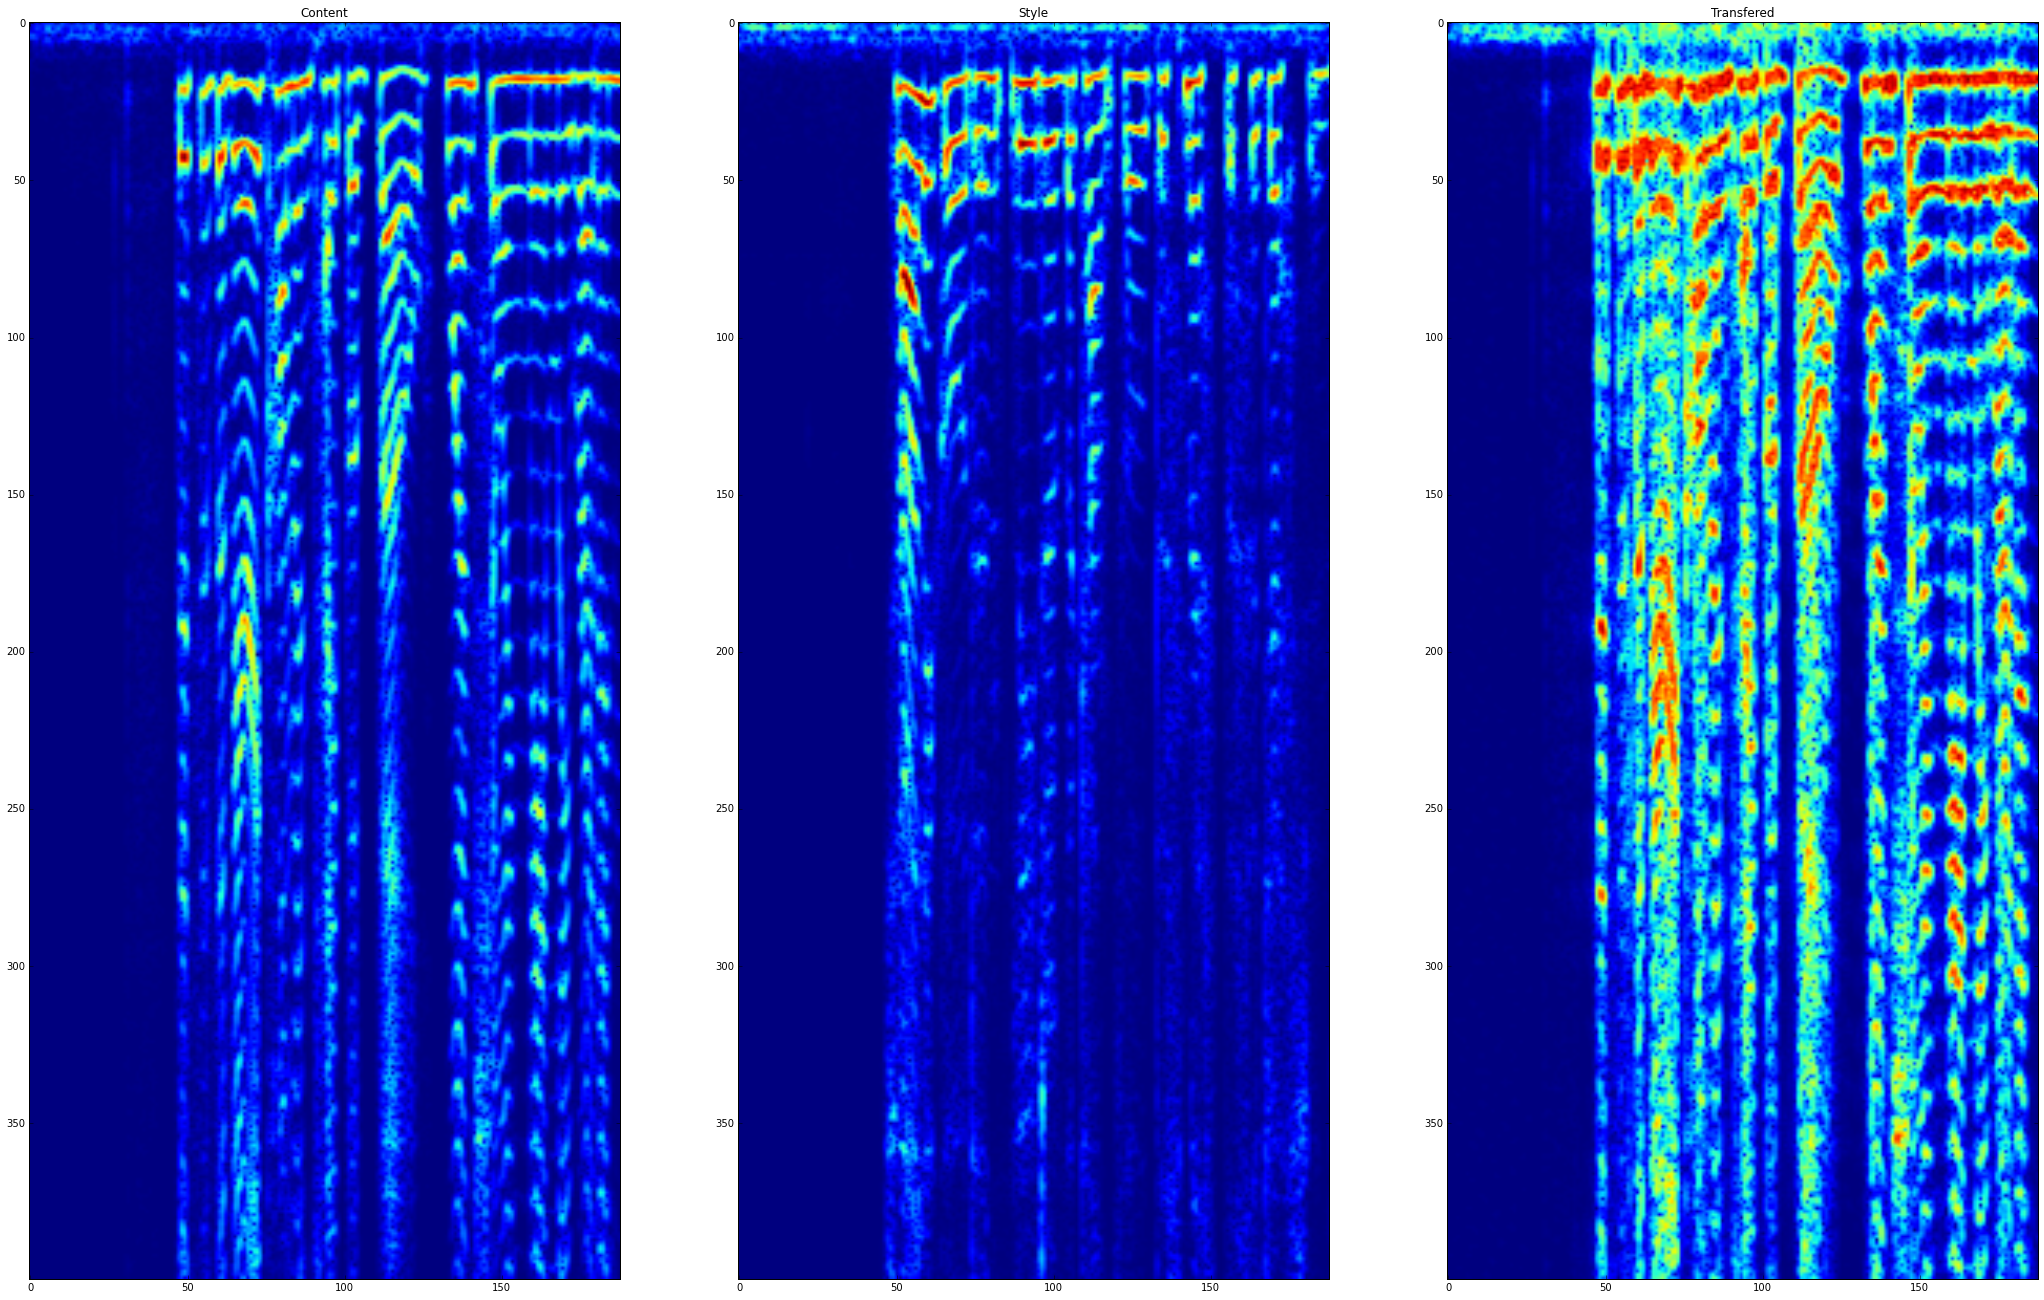

In [6]:
plt.figure(figsize=(3*12, 3*8))
plt.subplot(1, 3, 1)
plt.title('Content')
plt.imshow(a_content[:400,:])
plt.subplot(1, 3, 2)
plt.title('Style')
plt.imshow(a_style[:400,:])
plt.subplot(1, 3, 3)
plt.title('Transfered')
plt.imshow(a_transfered[:400,:])
plt.show()